In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline

In [28]:
dimension = 2
coordinate = 4
first = np.array([0, 0])
second = np.array([coordinate, coordinate])
third = np.array([0, coordinate])

num_points = 2000
X = np.zeros((num_points, dimension))
X[:1200, :] = np.random.randn(1200, dimension) * 2 + first
X[1200:1800, :] = np.random.randn(600, dimension) + second
X[1800:, :] = np.random.randn(200, dimension) * 0.5 + third

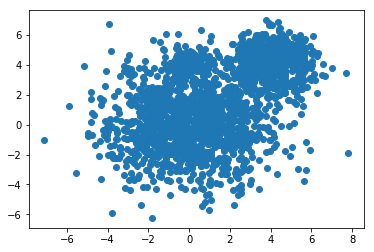

In [29]:
plt.scatter(X[:, 0], X[:, 1])

In [39]:
def gmm(X, K, max_iter=20, smoothing=0.001):
    num_points, dimension = X.shape
    mean = np.zeros((K, dimension))
    responsibilities = np.zeros((num_points, K))
    covariance = np.zeros((K, dimension, dimension))
    pi = np.ones(K) / K
    
    # Initialize mean to random, initialize covariance to spherical with variance 1
    for k in range(K):
        mean[k] = X[np.random.choice(num_points)]
        covariance[k] = np.eye(dimension)
    
    costs = np.zeros(max_iter)
    weighted_pdfs = np.zeros((num_points, K))
    
    for i in range(max_iter):
        # Calculating responsibilities
        for k in range(K):
            for n in range(num_points):
                weighted_pdfs[n, k] = pi[k] * multivariate_normal.pdf(x=X[n], mean=mean[k], cov=covariance[k])
        
        responsibilities = weighted_pdfs / weighted_pdfs.sum(axis=1, keepdims=True)
        
        # Updating model parameters
        for k in range(K):
            Nk = responsibilities[:, k].sum()
            pi[k] = Nk / num_points
            mean[k] = responsibilities[:, k].dot(X) / Nk
            covariance[k] = np.sum(responsibilities[n, k] * np.outer(X[n] - mean[k], X[n] - mean[k]) for n in range(num_points)) / Nk + np.eye(dimension) * smoothing 
        
        # Updating log likelihood loss
        costs[i] = np.log(weighted_pdfs.sum(axis=1)).sum()
        
        if i > 0:
            if np.abs(costs[i] - costs[i - 1]) < 0.1:
                break
    
    plt.plot(costs)
    plt.title('Training Cost')
    plt.show()
    
    random_colors = np.random.random((K, 3))
    colors = responsibilities.dot(random_colors)
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.show()
    
    print('Pi = {}'.format(pi))
    print('Mean = {}'.format(mean))
    print('Covariance = {}'.format(covariance))

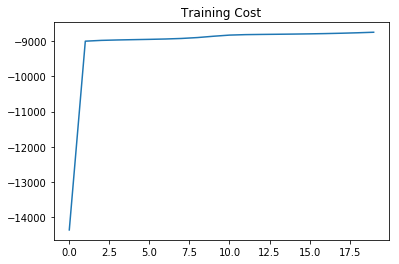

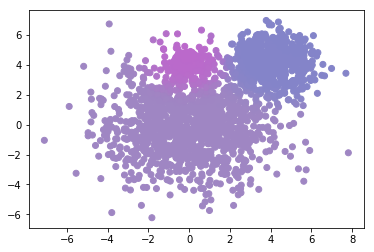

Pi = [ 0.301795    0.13038041  0.56782459]
Mean = [[  4.08084080e+00   4.06055257e+00]
 [ -6.76718281e-02   3.86011883e+00]
 [ -2.63698881e-03  -1.80722223e-01]]
Covariance = [[[ 0.98882694 -0.00883208]
  [-0.00883208  1.10058378]]

 [[ 0.48206878  0.03647921]
  [ 0.03647921  0.55659512]]

 [[ 4.38574478 -0.12317913]
  [-0.12317913  3.58336415]]]


In [40]:
gmm(X, 3)